# Predicting Titanic Survivors 🚢

This notebook implements a Machine Learning model to predict the survival of Titanic passengers based on various variables, such as age, ticket class, and the number of family members aboard.

In [3]:
# In[0.1]: Package Installation

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install statstests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.7 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


## 1️⃣ Importing Libraries 📚  

We train a **Logistic Regression** model to predict passenger survival. The model's performance is evaluated using metrics such as **accuracy**, **precision**, and **recall**.

In [4]:
# In[0.2]: Package Importation

import pandas as pd # Dataframe manipulation
import numpy as np # Mathematical operations
import seaborn as sns # Graphical visualization
import matplotlib.pyplot as plt # Graphical visualization
from scipy.interpolate import UnivariateSpline # Smoothed sigmoid curve
import statsmodels.api as sm # Model estimation
import statsmodels.formula.api as smf # Binary logistic model estimation
from statstests.process import stepwise # Stepwise procedure
from scipy import stats # Chi-square statistics
import plotly.graph_objects as go # 3D graphs
from statsmodels.iolib.summary2 import summary_col # Model comparison
from statsmodels.discrete.discrete_model import MNLogit # Model estimation

import warnings
warnings.filterwarnings('ignore') 

## 2️⃣ Loading and Exploring Data 🔍  

Here, we load the Titanic dataset and examine its dimensions, variable types, and missing values.

In [12]:
# In[0.3]: Importing Data

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# In[0.4]: Descriptive Analysis
df_train.describe()
df_train.info()
df_train['Survived'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
# In[0.5]: Absolute Frequency Table for Qualitative Variables

df_train['Sex'].value_counts().sort_index()
df_train['Embarked'].value_counts().sort_index()
df_train['Pclass'].value_counts().sort_index()
df_train['SibSp'].value_counts().sort_index()
df_train['Parch'].value_counts().sort_index()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

## 3️⃣ Data Cleaning and Feature Engineering ⚙️

We performed missing value handling, encoding of categorical variables, and created new features to improve the model's performance.

So now, it is possible to see that the data have the same non-null values and do not contain any null values.

In [15]:
# In[0.6]: Handling Missing Data

# Transforming 'PassengerId' to string type
df_train['PassengerId'] = df_train['PassengerId'].astype('str')

# Converting 'Cabin' column to binary (1 if not null, 0 if null)
df_train['Cabin'] = df_train['Cabin'].notna().astype(int)

# Filling missing values in the "Age" column with the mean age of the dataset
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

# Exclude the rows where 'EMBARKED' is NAN
df_train = df_train.dropna(subset=['Embarked'])

So now, it is possible to see that the data have the same non-null values and do not contain any null values.

In [16]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    object 
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    int64  
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


The dummyization process converts categorical variables into binary (0 or 1) variables, making them usable in machine learning models. The pd.get_dummies function is used to create these variables, and the drop_first=True option removes the first category of each variable to avoid multicollinearity.

In [17]:
# In[0.7]: Converting Categorical Variables to Dummies

df_titanic_dummies = pd.get_dummies(df_train,
                                    columns=['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch'],
                                    dtype=int,
                                    drop_first=True)

df_titanic_dummies.info()
df_titanic_dummies

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    object 
 1   Survived     889 non-null    int64  
 2   Name         889 non-null    object 
 3   Age          889 non-null    float64
 4   Ticket       889 non-null    object 
 5   Fare         889 non-null    float64
 6   Cabin        889 non-null    int64  
 7   Sex_male     889 non-null    int64  
 8   Embarked_Q   889 non-null    int64  
 9   Embarked_S   889 non-null    int64  
 10  Pclass_2     889 non-null    int64  
 11  Pclass_3     889 non-null    int64  
 12  SibSp_1      889 non-null    int64  
 13  SibSp_2      889 non-null    int64  
 14  SibSp_3      889 non-null    int64  
 15  SibSp_4      889 non-null    int64  
 16  SibSp_5      889 non-null    int64  
 17  SibSp_8      889 non-null    int64  
 18  Parch_1      889 non-null    int64  
 19  Parch_2      

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,PC 17599,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,211536,13.0000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,112053,30.0000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,W./C. 6607,23.4500,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,111369,30.0000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4️⃣ Building the Machine Learning Model 🤖¶

We trained a Logistic Regression model using sm.logit.from_formula to predict passenger survival. We evaluated its performance using metrics such as accuracy, precision, and recall.

In [20]:
# In[0.8]: Model Formula

lista_dummies = list(df_titanic_dummies.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived']))
formula_titanic_model = ' + '.join(lista_dummies)
formula_titanic_model = "Survived ~ " + formula_titanic_model
print(formula_titanic_model)

Survived ~ Age + Fare + Cabin + Sex_male + Embarked_Q + Embarked_S + Pclass_2 + Pclass_3 + SibSp_1 + SibSp_2 + SibSp_3 + SibSp_4 + SibSp_5 + SibSp_8 + Parch_1 + Parch_2 + Parch_3 + Parch_4 + Parch_5 + Parch_6


In [24]:
# In[0.9]: Logistic Regression Model

modelo_titanic = sm.Logit.from_formula(formula_titanic_model, df_titanic_dummies).fit()

         Current function value: 0.427005
         Iterations: 35


The output provided is the result of a logistic regression model used to predict survival on the Titanic based on several features. Here's a brief interpretation of the key components:

### Model Summary:
- **Dependent Variable**: Survived (binary: 0 = Did not survive, 1 = Survived)
- **Number of Observations**: 889
- **Log-Likelihood**: -379.61
- **Pseudo R-squared**: 0.3581 (This indicates a moderate fit of the model to the data)
- **LLR p-value**: 2.559e-77 (Very small, indicating that the model is statistically significant)

### Coefficients and Interpretation:
The table lists the estimated coefficients, standard errors, z-statistics, p-values, and the confidence intervals for each variable in the model. The most relevant columns are:

- **Coef**: The estimated coefficient for each variable. Positive values indicate a higher likelihood of survival, while negative values indicate a lower likelihood of survival.
- **P>|z|**: The p-value tests whether the coefficient is significantly different from zero. Small p-values (typically less than 0.05) indicate that the variable is statistically significant.
  
### Key Variables:
- **Age**: A negative coefficient (-0.0371), indicating that as age increases, the likelihood of survival decreases.
- **Fare**: A positive coefficient (0.0021), suggesting that passengers who paid higher fares had a slightly higher chance of survival, although it is not statistically significant (p-value = 0.408).
- **Cabin**: A positive and statistically significant coefficient (0.8483, p-value = 0.013), indicating that passengers with a cabin had a higher chance of survival.
- **Sex_male**: A large negative coefficient (-2.6583, p-value < 0.0001), suggesting that being male significantly decreased the likelihood of survival.
- **Pclass_3**: A negative coefficient (-1.3910, p-value = 0.001), indicating that passengers in third class had a much lower chance of survival compared to those in first class (baseline reference).
- **SibSp_1, SibSp_3, SibSp_4**: These coefficients suggest that passengers with certain numbers of siblings/spouses aboard had varied survival chances, with some showing negative impacts on survival.

### Other Variables:
- Some variables like **Embarked_Q** and **Parch_2** are not statistically significant (p-values > 0.05), meaning they do not contribute meaningfully to the prediction of survival in this model.
- Several variables (e.g., **Parch_4** and **SibSp_5**) have extremely large standard errors or coefficients that suggest issues with the data, such as very rare cases (e.g., Parch_4).

In [25]:
modelo_titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      868
Method:                           MLE   Df Model:                           20
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3581
Time:                        17:00:32   Log-Likelihood:                -379.61
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.559e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0934      0.554      5.579      0.000       2.007       4.180
Age           -0.0371      0.008     -4.379      0.000      -0.054      -0.021
Fare           0.0021      0.002      0.827      0.408      -0.003       0.007
Cabin          0.8483      0.342      2.480      0.013       0.178       1.519
Sex_male      -2.6583      0.204    -13.015      0.000      -3.059      -2.258
Embarked_Q     0.0515      0.387      0.133      0.894      -0.707       0.810
Embarked_S    -0.3664      0.246     -1.490      0.136      -0.848       0.116
Pclass_2      -0.3715      0.396     -0.937      0.349      -1.149       0.406
Pclass_3      -1.3910      0.402     -3.463      0.001      -2.178      -0.604
SibSp_1        0.0945      0.225      0.420      0.674      -0.346       0.535
SibSp_2       -0.2770      0.543     -0.510      0.610      -1.341       0.787
SibSp_3       -2.1215      0.725     -2.926      0.003      -3.543      -0.700
SibSp_4       -1.5998      0.763     -2.097      0.036      -3.095      -0.104
SibSp_5      -16.3504   1996.191     -0.008      0.993   -3928.813    3896.112
SibSp_8       -3.6229      2.931     -1.236      0.216      -9.367       2.121
Parch_1        0.2742      0.294      0.933      0.351      -0.302       0.850
Parch_2       -0.0028      0.380     -0.007      0.994      -0.748       0.742
Parch_3        0.3380      1.053      0.321      0.748      -1.726       2.402
Parch_4      -25.2769   1.88e+05     -0.000      1.000   -3.68e+05    3.68e+05
Parch_5       -1.2322      1.172     -1.052      0.293      -3.529       1.065
Parch_6      -10.4201    189.584     -0.055      0.956    -381.999     361.159
==============================================================================
"""

In [27]:
# In[1.0]: Procedure

# Filtering variables with p-value > 0.05
p_values = modelo_titanic.pvalues[1:]  # Ignore the intercept
cols_to_remove = p_values[p_values > 0.05].index.tolist()

# Removing columns with p-value > 0.05
df_cleaned = df_titanic_dummies.drop(columns=cols_to_remove)

# Recreating the formula with the remaining variables
lista_dummies_new = list(df_cleaned.drop(columns=['Survived',
                                                  'Name',
                                                  'Ticket',
                                                  'PassengerId']))

formula_titanic_model_new = ' + '.join(lista_dummies_new)
formula_titanic_model_new = "Survived ~ " + formula_titanic_model_new
print(formula_titanic_model_new)

# Estimating the logistic model again with significant variables
modelo_titanic_new = sm.Logit.from_formula(formula_titanic_model_new,
                                           df_cleaned).fit()

Survived ~ Age + Cabin + Sex_male + Pclass_3 + SibSp_3 + SibSp_4
Optimization terminated successfully.
         Current function value: 0.441384
         Iterations 6


The procedure you've outlined filters out the variables with a p-value greater than 0.05 and refits the logistic regression model. Here's a summary of the steps performed:

### Steps Taken:
1. **Filtering Variables**:
   - Identified variables with p-values greater than 0.05, which are considered statistically insignificant, and removed them from the dataset.

2. **Refitting the Model**:
   - Recreated the formula for logistic regression with the remaining significant variables.
   - Re-estimated the logistic model using the cleaned dataset.

### Results of the Refitted Model:
The output for the refitted model shows the following:

- **Pseudo R-squared**: 0.3365 (slightly lower than the previous model, indicating a moderate fit).
- **Log-Likelihood**: -392.39 (indicating how well the model fits the data, though it's not directly comparable to R-squared).
- **LLR p-value**: 7.385e-83 (indicating that the model is statistically significant).
- **Coefficients**:
  - **Intercept**: 2.6442 (statistically significant with p-value < 0.05).
  - **Age**: -0.0379 (statistically significant with p-value < 0.05, indicating that as age increases, the likelihood of survival decreases).
  - **Cabin**: 1.2439 (statistically significant with p-value < 0.05, indicating that passengers with a cabin had a higher chance of survival).
  - **Sex_male**: -2.6529 (statistically significant with p-value < 0.05, indicating that males had a much lower chance of survival).
  - **Pclass_3**: -1.2084 (statistically significant with p-value < 0.05, indicating that passengers in third class had a lower chance of survival).
  - **SibSp_3**: -2.0038 (statistically significant with p-value < 0.05, indicating that passengers with 3 siblings/spouses aboard had a lower chance of survival).
  - **SibSp_4**: -1.5203 (statistically significant with p-value < 0.05, indicating that passengers with 4 siblings/spouses aboard had a lower chance of survival).

### Conclusion:
After removing the insignificant variables, the model became more refined. It suggests that factors like age, cabin, sex, passenger class, and the number of siblings/spouses aboard are significant predictors of survival on the Titanic.

In [28]:
modelo_titanic_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3365
Time:                        17:02:06   Log-Likelihood:                -392.39
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 7.385e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6442      0.327      8.093      0.000       2.004       3.285
Age           -0.0379      0.008     -4.848      0.000      -0.053      -0.023
Cabin          1.2439      0.245      5.071      0.000       0.763       1.725
Sex_male      -2.6529      0.191    -13.871      0.000      -3.028      -2.278
Pclass_3      -1.2084      0.215     -5.625      0.000      -1.629      -0.787
SibSp_3       -2.0038      0.685     -2.927      0.003      -3.346      -0.662
SibSp_4       -1.5203      0.737     -2.064      0.039      -2.964      -0.076
==============================================================================
"""

In [29]:
# In[1.1]: Confusion Matrix and Model Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, \
    ConfusionMatrixDisplay, recall_score

def confusion_matrix_plot(predicts, observed, cutoff):
    values = predicts.values
    binary_prediction = [1 if item >= cutoff else 0 for item in values]
    
    cm = confusion_matrix(binary_prediction, observed)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    
    sensitivity = recall_score(observed, binary_prediction, pos_label=1)
    specificity = recall_score(observed, binary_prediction, pos_label=0)
    accuracy = accuracy_score(observed, binary_prediction)

    # Displaying the main indicators of this confusion matrix
    indicators = pd.DataFrame({'Sensitivity': [sensitivity],
                               'Specificity': [specificity],
                               'Accuracy': [accuracy]})
    return indicators


In [31]:
# In[1.1] Adding the predicted probability values to the dataset
df_titanic_dummies['phat'] = modelo_titanic_new.predict()

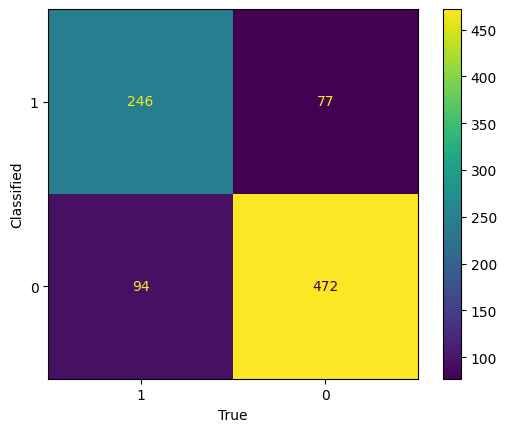

,Sensitivity,Specificity,Accuracy
0,0.723529,0.859745,0.807649


In [32]:
# In[1.2] Confusion matrix for cutoff = 0.5
confusion_matrix_plot(observed=df_titanic_dummies['Survived'],
                      predicts=df_titanic_dummies['phat'],
                      cutoff=0.5)

In [34]:
# In[1.3] Sensitivity and Specificity Calculation at Different Cutoffs

def espec_sens(observed, predicts):
    
    # Add object with the prediction values
    values = predicts.values
    
    # Range of cutoffs to be analyzed in steps of 0.01
    cutoffs = np.arange(0, 1.01, 0.01)
    
    # Lists to store the results of specificity and sensitivity
    sensitivity_list = []
    specificity_list = []
    
    for cutoff in cutoffs:
        
        binary_prediction = []
        
        # Defining binary outcome based on the prediction
        for item in values:
            if item >= cutoff:
                binary_prediction.append(1)
            else:
                binary_prediction.append(0)
                
        # Calculate sensitivity and specificity at the cutoff
        sensitivity = recall_score(observed, binary_prediction, pos_label=1)
        specificity = recall_score(observed, binary_prediction, pos_label=0)
        
        # Append values to the lists
        sensitivity_list.append(sensitivity)
        specificity_list.append(specificity)
        
    # Create dataframe with the results at the respective cutoffs
    result = pd.DataFrame({'cutoffs': cutoffs, 'sensitivity': sensitivity_list, 'specificity': specificity_list})
    return result

In [35]:
# In[1.4]: So far, three vectors have been extracted: 'sensitivity',
# 'specificity', and 'cutoffs'. Thus, we create a dataframe that contains
# the mentioned vectors

plotting_data = espec_sens(observed = df_titanic_dummies['Survived'],
                            predicts = df_titanic_dummies['phat'])
plotting_data


,cutoffs,sensitivity,specificity
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.000000
2,0.02,1.000000,0.003643
3,0.03,1.000000,0.010929
4,0.04,1.000000,0.021858
...,...,...,...
96,0.96,0.032353,0.998179
97,0.97,0.002941,0.998179
98,0.98,0.000000,1.000000
99,0.99,0.000000,1.000000


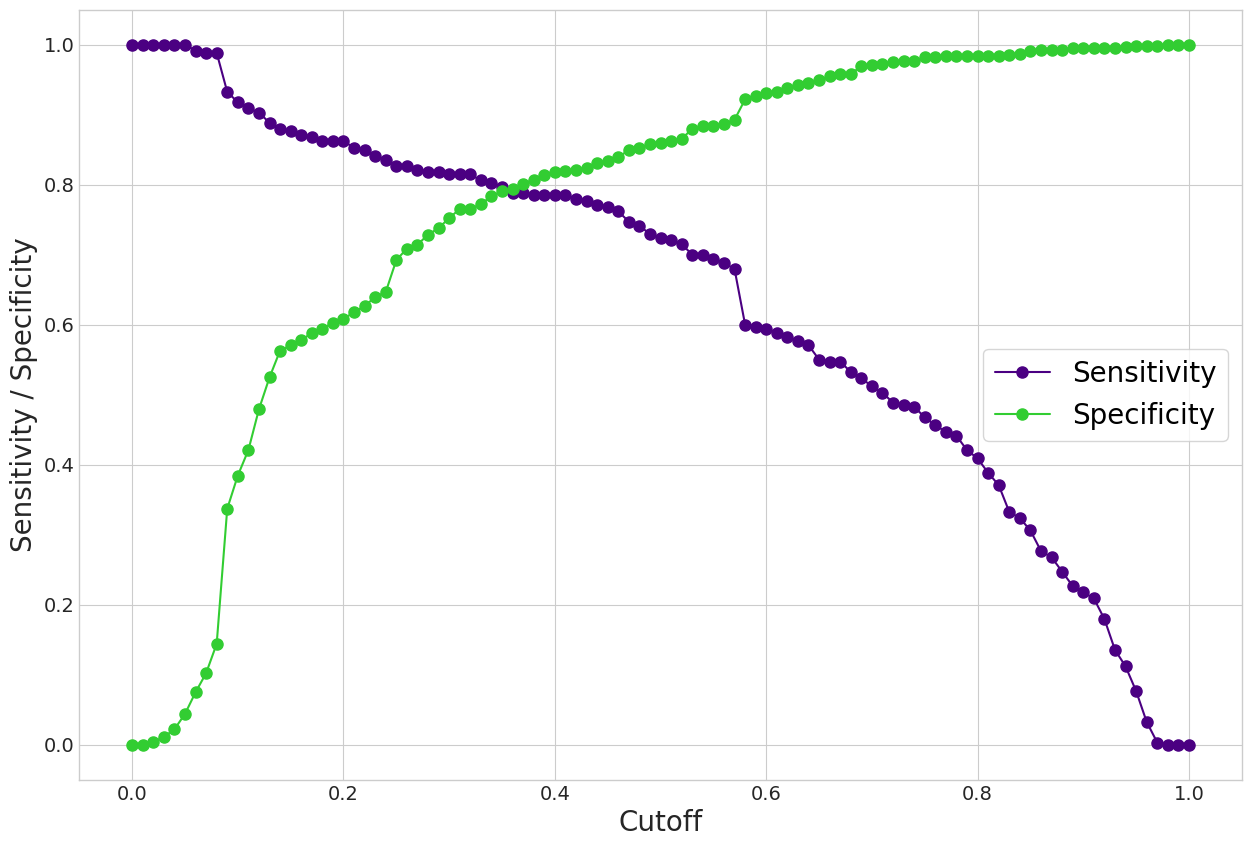

In [36]:
# In[1.5]: Plotting a graph that shows the variation of specificity and sensitivity
# as a function of the cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(plotting_data.cutoffs, plotting_data.sensitivity, marker='o',
         color='indigo', markersize=8)
    plt.plot(plotting_data.cutoffs, plotting_data.specificity, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cutoff', fontsize=20)
plt.ylabel('Sensitivity / Specificity', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitivity', 'Specificity'], fontsize=20)
plt.show()


In [38]:
# In[1.6]: Constructing the ROC curve

from sklearn.metrics import roc_curve, auc

# 'roc_curve' function from the 'metrics' package of sklearn

fpr, tpr, thresholds = roc_curve(df_titanic_dummies['Survived'],
                                  df_titanic_dummies['phat'])
roc_auc = auc(fpr, tpr)


In [39]:
# In[1.7] Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

The **ROC Curve (Receiver Operating Characteristic)** and **Gini** are important metrics for evaluating the performance of a classification model, especially in binary classification problems, like your case with predicting passenger survival.

### Interpretation of the Results:
1. **ROC Curve - 0.85**:
   - The **ROC Curve** (and the **AUC - Area Under the Curve**) of **0.85** indicates that the model performs well in distinguishing between the positive and negative classes with a good success rate. Values close to **1.0** (perfect) indicate excellent performance, while values below **0.7** may indicate unsatisfactory performance.
   - Therefore, an AUC of **0.85** suggests that the model has a good ability to discriminate between the classes.

2. **Gini - 0.71**:
   - The **Gini** is a metric related to AUC and is frequently used to assess the model’s discriminative power. A **Gini** value of **0.71** is very good because values close to **1** indicate high precision in separating the classes.
   - Gini is calculated as **2 * AUC - 1**, so a Gini of **0.71** corresponds to an AUC of approximately **0.855**, which is consistent with your ROC curve.

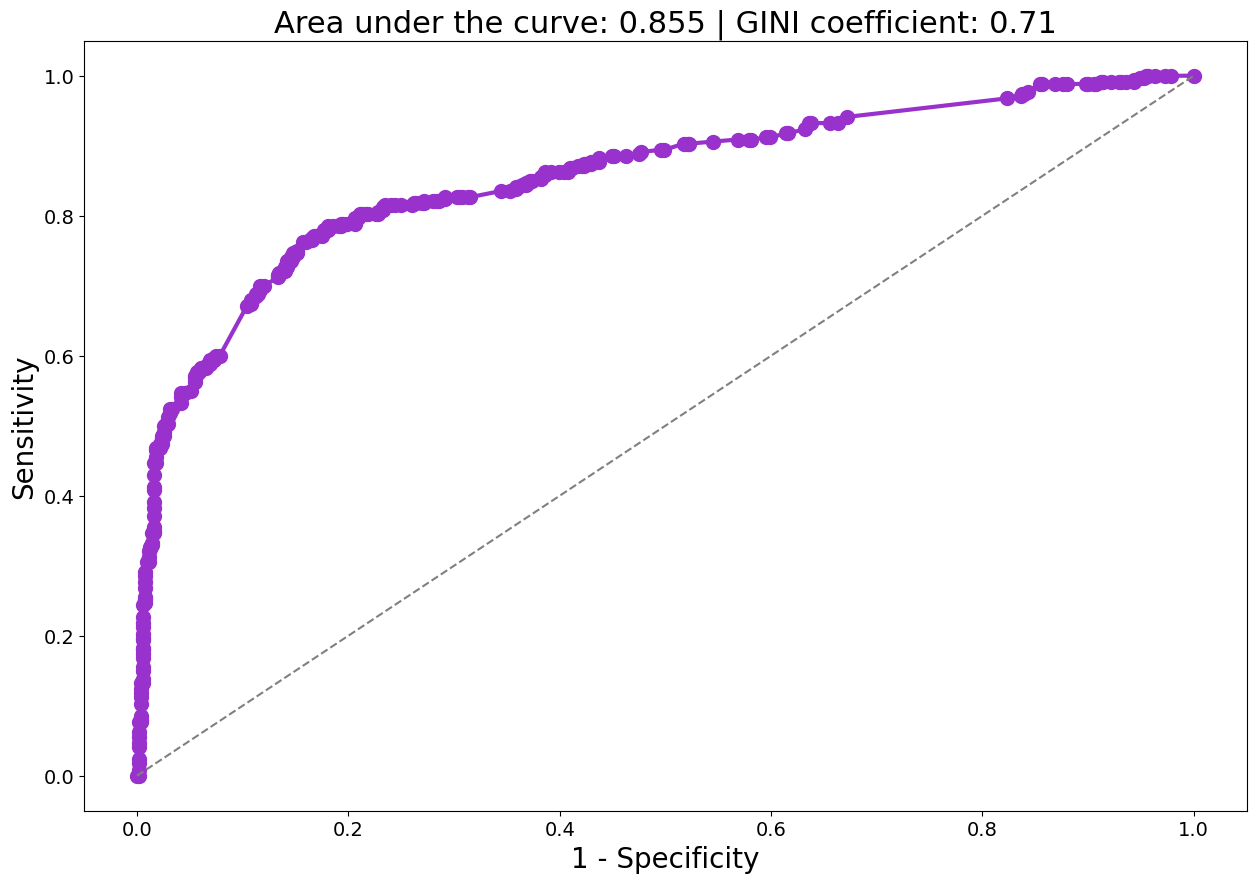

In [40]:
# In[1.8] Plotting the ROC curve
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Area under the curve: %g' % round(roc_auc, 4) +
          ' | GINI coefficient: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()


# **To apply the same procedures to the test dataset**

In [41]:
# In[1.9]: Importing the test data

df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

df_test.info()

df_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
# In[2.0]: Descriptive analysis

# Transforming 'PassengerId' to type 'str'
df_test['PassengerId'] = df_test['PassengerId'].astype('str')

# Transforming the 'Cabin' variable to binary (1 or 0)
df_test['Cabin'] = df_test['Cabin'].notna().astype(int)

# Replacing missing values in 'Age' and 'Fare' with the mean
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

df_test.info()

df_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    object 
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,1,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,0,S


In [47]:
# In[2.1]: Dummy encoding of the 'Sex', 'Embarked', 'Pclass', 'SibSp', and 'Parch' variables in the test set

df_test_dummies = pd.get_dummies(df_test,
                                    columns=['Sex',
                                             'Embarked',
                                             'Pclass',
                                             'SibSp',
                                             'Parch'],
                                    dtype=int,
                                    drop_first=True)

# Ensure that the test set columns are the same as the training set
df_test_dummies = df_test_dummies.reindex(columns=df_titanic_dummies.columns, fill_value=0)

# Selecting the relevant columns for the model
desired_columns = ['Age', 'Cabin', 'Sex_male', 'Pclass_3', 'SibSp_3', 'SibSp_4']
df_test_dummies = df_test_dummies.loc[:, desired_columns]


In [50]:
# In[2.2]: Making predictions

predictions = modelo_titanic_new.predict(df_test_dummies)

# Converting probabilities to classes (0 or 1) using 0.5 as the threshold
df_test['Survived'] = (predictions > 0.5).astype(int)
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,0,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,0,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,0,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,1,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,0,S,0


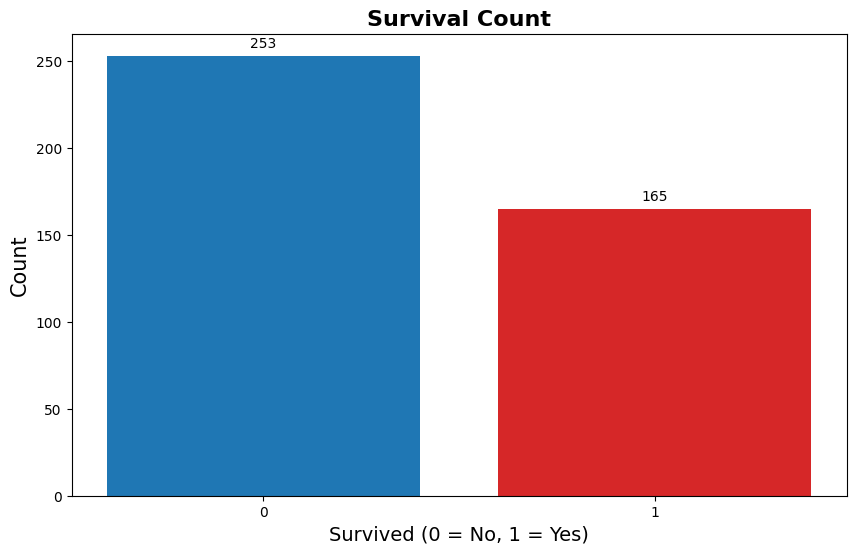

In [52]:
# In[2.3] Counting the occurrences of 0 and 1 in the 'Survived' column
survived_counts = df_test['Survived'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10,6))

# Defining the color palette for 0 (blue) and 1 (red)
colors = ['#1f77b4', '#d62728']  # Blue for 0, Red for 1

# Plotting the bar chart
bars = plt.bar(survived_counts.index.astype(str), survived_counts.values, color=colors)

# Adding values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 0), ha='center', fontsize=10, color='black')

# Adding title and labels
plt.title('Survival Count', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=15)

# Displaying the chart
plt.show()


In [53]:
# In[2.4]: Preparando o arquivo para submissão

submission = df_test[['PassengerId']].copy()
submission['Survived'] = df_test['Survived'].copy()

# Salvando o arquivo CSV corretamente
submission.to_csv('submission.csv', index=False, sep=",")